In [2]:
#load data
import numpy as np
import pandas as pd
from scipy.io.arff import loadarff

data1, meta1 = loadarff('./data/steel-plates-fault.arff')
data2, meta2 = loadarff('./data/ionosphere.arff')
data3, meta3 = loadarff('./data/banknotes.arff')

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
df3 = pd.DataFrame(data3)
df1.name = "steel-plates-fault"
df2.name = "ionosphere"
df3.name = "banknotes"


In [3]:
#prepare data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

def prep_data(df):
    x = df.drop(df.columns[-1],axis=1)
    y = df[df.columns[-1]]
    x = x.to_numpy()
    y = le.fit_transform(y)
    return train_test_split(x, y, test_size=0.5)
    

In [4]:
#print graph
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

scientific_values_list = [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
tree_depth_list = [1,3,5,8,10]
c_list = [0.1,0.5,1.0,2.0,5.0]
mlp_alpha_list = [1e-5, 1e-3, 0.1, 10]

def print_graph(acc, title, xlabel):
    fig, ax = plt.subplots()
    x_values = list(acc.keys())
    accuracy_scores = list(acc.values())
    if title.find("(KNN)") != -1:
        ax.boxplot(accuracy_scores)
        plt.xticks(np.arange(1, 6, 1))
    if title.find("(GaussianNB)") != -1:
        ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
        ax.boxplot(accuracy_scores, positions=np.arange(1, len(scientific_values_list) + 1))
        plt.xticks(np.arange(1, len(scientific_values_list) + 1), scientific_values_list)
    if title.find("(DT)") != -1 or title.find("(Gradient Boosted DTs)") != -1 or title.find("(Random Forest)") != -1:
        ax.boxplot(accuracy_scores, positions=np.arange(1, len(tree_depth_list) + 1))
        plt.xticks(np.arange(1, len(tree_depth_list) + 1), tree_depth_list)
    if title.find("(LR)") != -1:
        ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
        ax.boxplot(accuracy_scores, positions=np.arange(1, len(c_list) + 1))
        plt.xticks(np.arange(1, len(c_list) + 1), c_list)
    if title.find("(MLP)") != -1:
        ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
        ax.boxplot(accuracy_scores, positions=np.arange(1, len(mlp_alpha_list) + 1))
        plt.xticks(np.arange(1, len(mlp_alpha_list) + 1), mlp_alpha_list)
    plt.title(f"{title}") 
    plt.ylabel('Accuracy') 
    plt.xlabel(f"{xlabel}") 
    plt.savefig(f"./plots/classifiers/{title}.png")
    

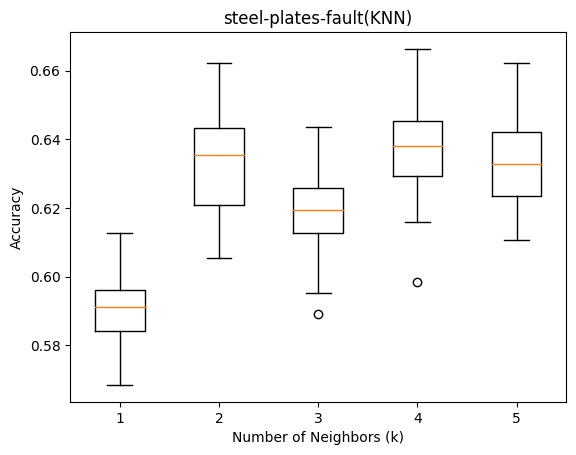

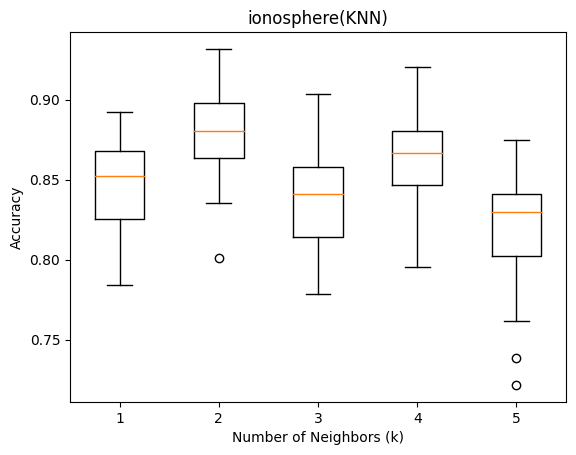

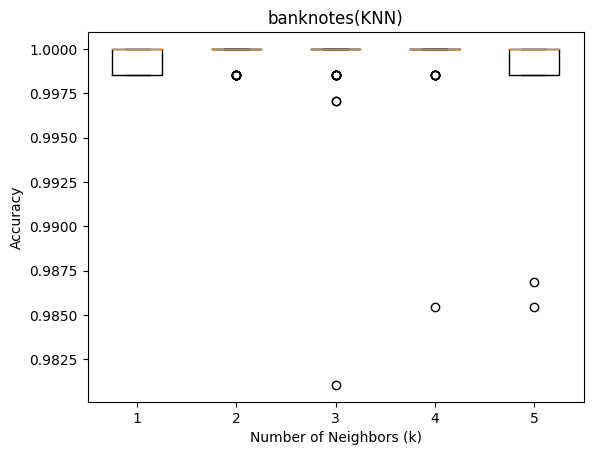

In [5]:
#KNeighborsClassifier (K nearest neighbours) 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def knn_classifier(df):
    map = {}
    for k in range(1,6):
        accuracy = np.ones((50,),dtype=float)
        for i in range(0,50):
            train_x,test_x,train_y,test_y = prep_data(df)
            neigh = KNeighborsClassifier(n_neighbors = k)
            neigh.fit(train_x,train_y)
            predictions = neigh.predict(test_x)
            accuracy[i] = accuracy_score(test_y, predictions)
        map[k] = accuracy
        title = f"{df.name}(KNN)"
    print_graph(map,title,"Number of Neighbors (k)")


knn_classifier(df1)
knn_classifier(df2)
knn_classifier(df3)

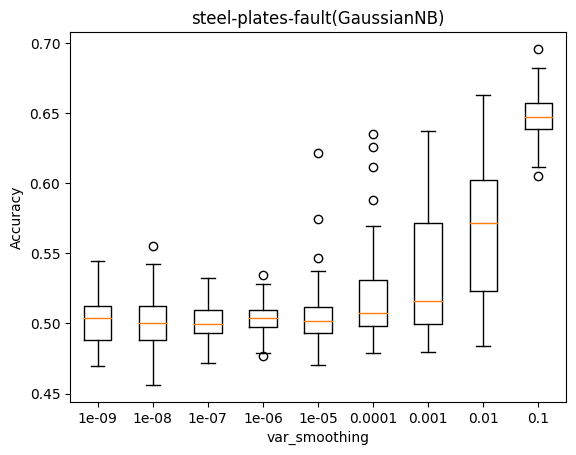

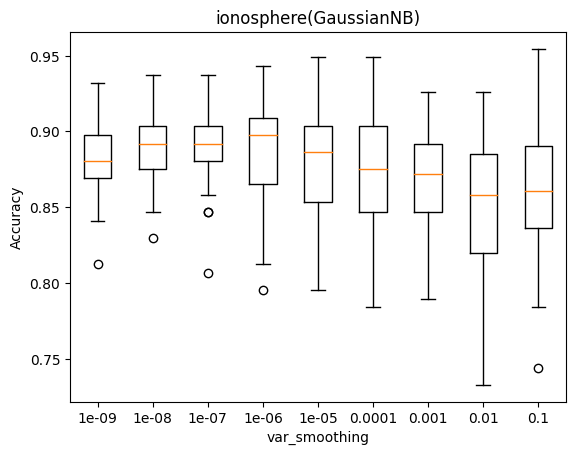

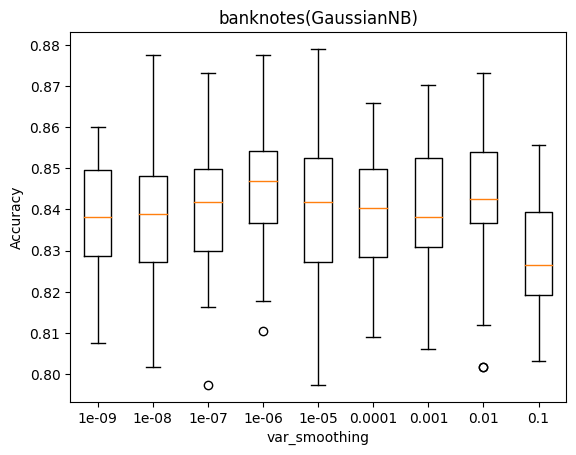

In [6]:
# GaussianNB (the Gaussian form of Naive Bayes)
from sklearn.naive_bayes import GaussianNB

def gaussiannb_classifier(df):
    map={}
    for v in scientific_values_list:
        accuracy = np.ones((50,),dtype=float)
        for i in range(0,50):
            train_x,test_x,train_y,test_y = prep_data(df)
            clf = GaussianNB(var_smoothing=v)
            clf.fit(train_x,train_y)
            predictions = clf.predict(test_x)
            accuracy[i] = accuracy_score(test_y, predictions)
        map[v] = accuracy
    title = f"{df.name}(GaussianNB)"
    print_graph(map,title,"var_smoothing")


gaussiannb_classifier(df1)
gaussiannb_classifier(df2)
gaussiannb_classifier(df3)


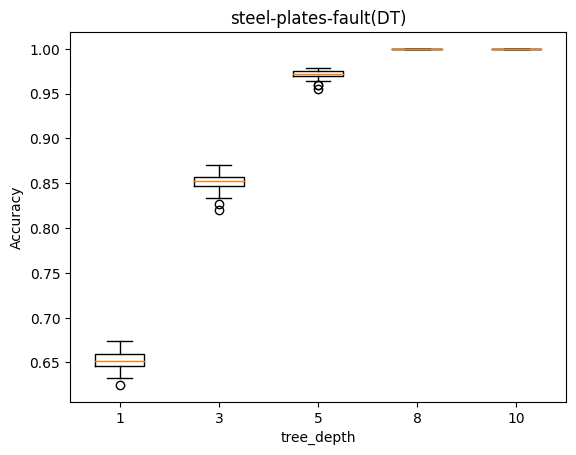

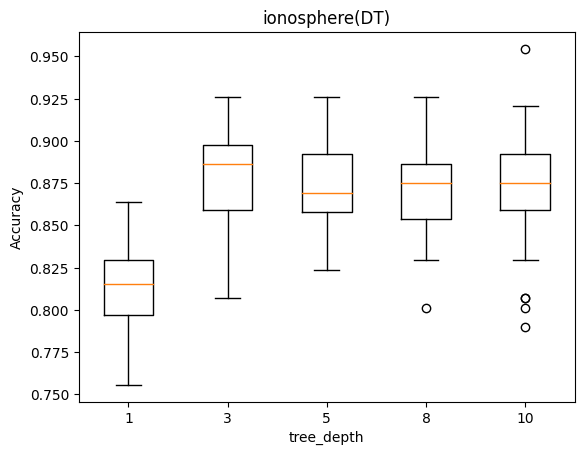

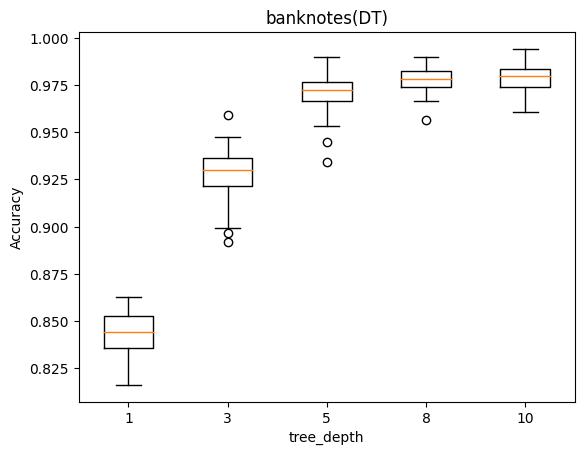

In [7]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

def decision_tree_classifier(df):
    map={}
    for d in tree_depth_list:
        accuracy = np.ones((50,),dtype=float)
        for i in range(0,50):
            train_x,test_x,train_y,test_y = prep_data(df)
            dt_clf = DecisionTreeClassifier(max_depth=d, random_state=0)
            dt_clf.fit(train_x, train_y)
            predictions = dt_clf.predict(test_x)
            accuracy[i] = accuracy_score(test_y, predictions)
        map[d] = accuracy
    title = f"{df.name}(DT)"
    print_graph(map,title,"tree_depth")


decision_tree_classifier(df1)
decision_tree_classifier(df2)
decision_tree_classifier(df3)



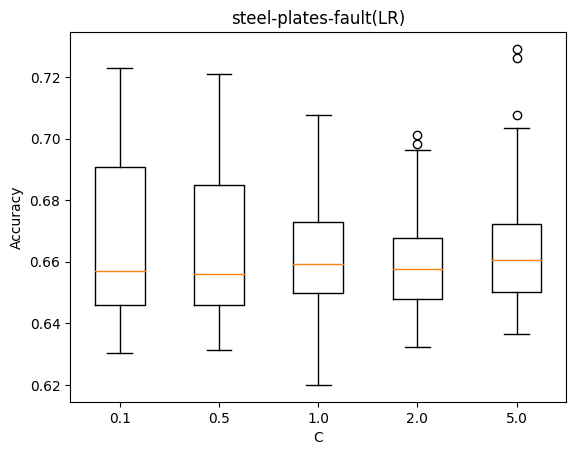

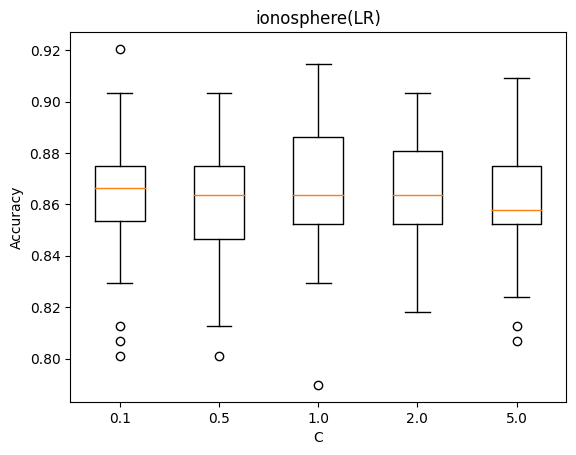

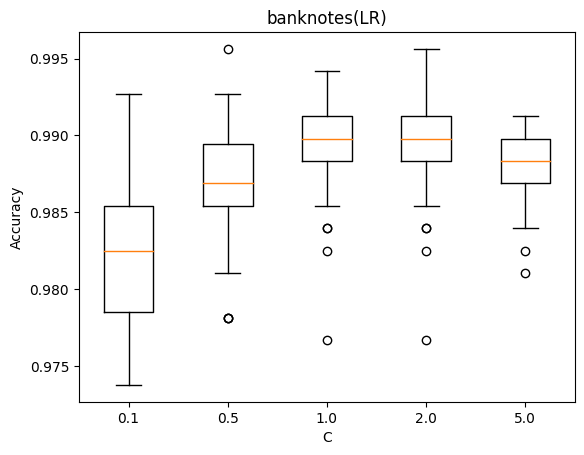

In [8]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression

def logistic_regression(df):
    map = {}
    for c in c_list:
        accuracy = np.ones((50,),dtype=float)
        for i in range(0,50):
            train_x,test_x,train_y,test_y = prep_data(df)
            logreg = LogisticRegression(C=c, max_iter=1200)
            logreg.fit(train_x, train_y)
            predictions = logreg.predict(test_x)
            accuracy[i] = accuracy_score(test_y, predictions)
        map[c] = accuracy
    title = f"{df.name}(LR)"
    print_graph(map,title,"C")


logistic_regression(df1)
logistic_regression(df2)
logistic_regression(df3)

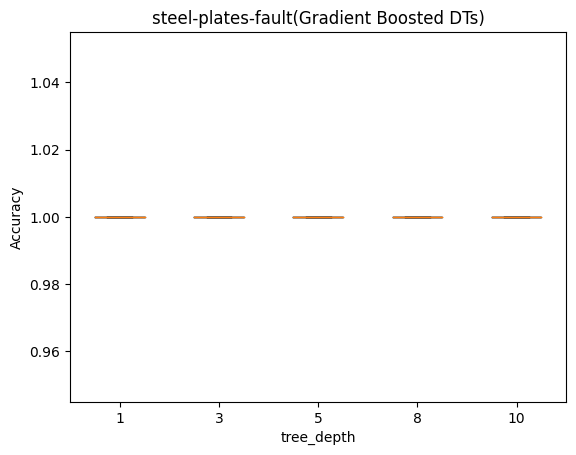

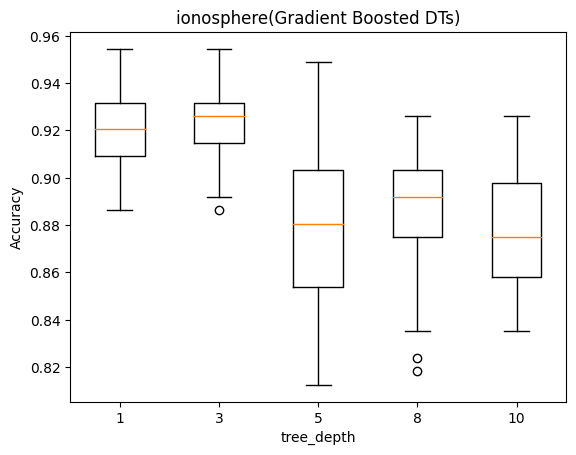

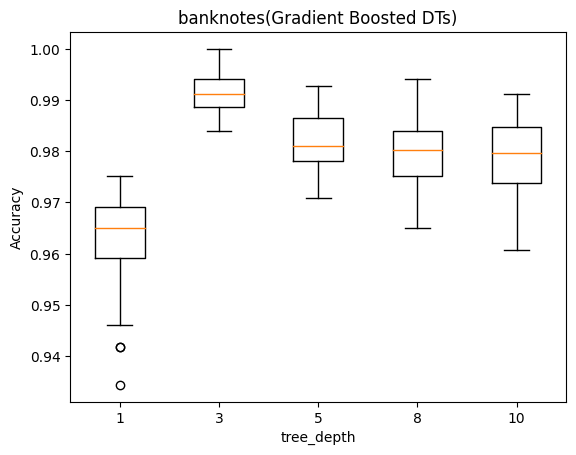

In [10]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
def gradient_boosting_classifier(df):
    map={}
    for d in tree_depth_list:
        accuracy = np.ones((50,),dtype=float)
        for i in range(0,50):
            train_x,test_x,train_y,test_y = prep_data(df)
            gb_clf = GradientBoostingClassifier(n_estimators=100, max_depth=d, random_state=543)
            gb_clf.fit(train_x, train_y)
            gb_clf.predict(test_x)
            predictions = gb_clf.predict(test_x)
            accuracy[i] = accuracy_score(test_y, predictions)
        map[d] = accuracy
    title = f"{df.name}(Gradient Boosted DTs)"
    print_graph(map,title,"tree_depth")


gradient_boosting_classifier(df1)
gradient_boosting_classifier(df2)
gradient_boosting_classifier(df3)

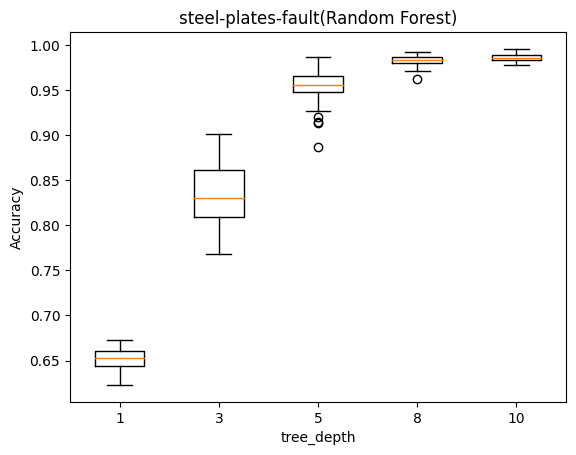

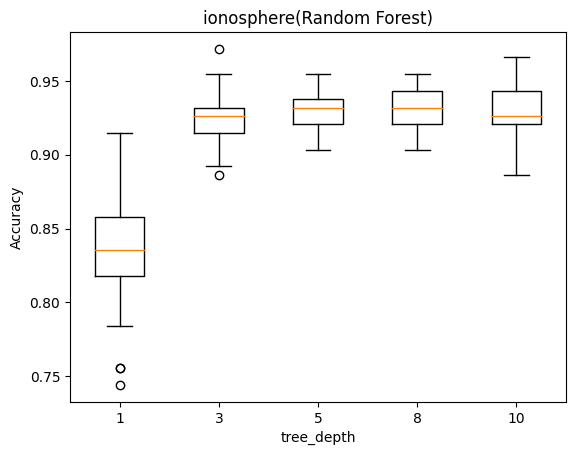

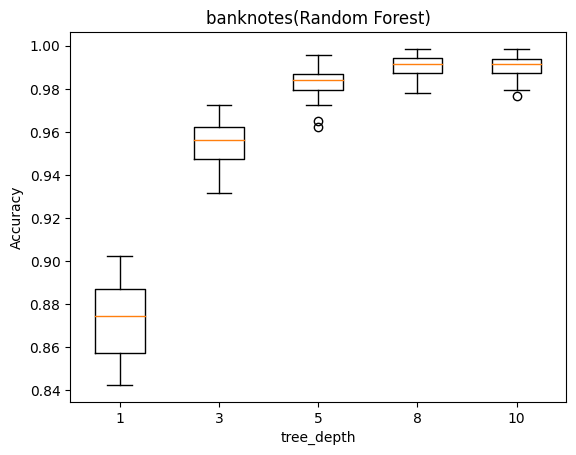

In [ ]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
def random_forest_classifier(df):
    map = {}
    for d in tree_depth_list:
        accuracy = np.ones((50,),dtype=float)
        for i in range(0,50):
            train_x,test_x,train_y,test_y = prep_data(df)
            rf_clf = RandomForestClassifier(n_estimators=500, max_depth=d, random_state=33)
            rf_clf.fit(train_x, train_y)
            predictions = rf_clf.predict(test_x)
            accuracy[i] = accuracy_score(test_y, predictions)
        map[d] = accuracy
    title = f"{df.name}(Random Forest)"
    print_graph(map,title,"tree_depth")


random_forest_classifier(df1)
random_forest_classifier(df2)
random_forest_classifier(df3)

/home/gawk/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/gawk/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/gawk/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTA

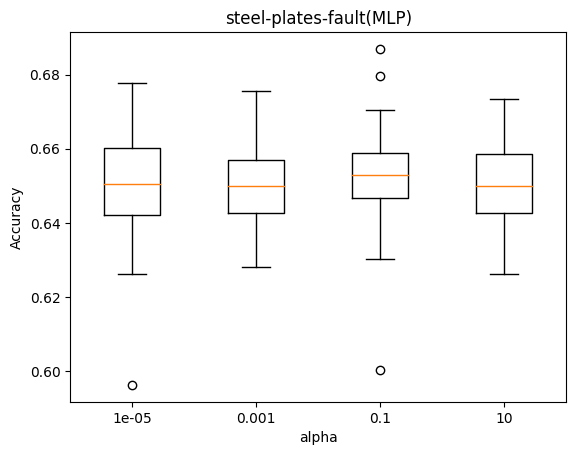

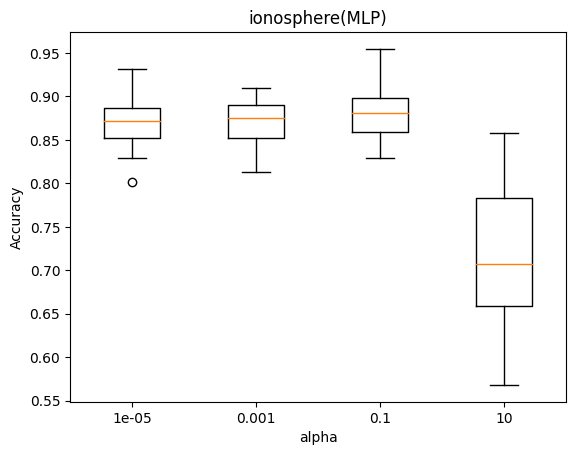

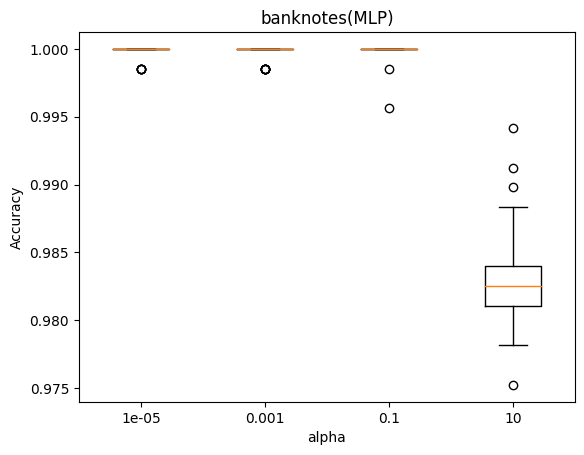

In [12]:
#MLPClassifier
from sklearn.neural_network import MLPClassifier

def neural_network(df):
    map = {}
    for a in mlp_alpha_list:
        accuracy = np.ones((50,),dtype=float)
        for i in range(0,50):
            train_x,test_x,train_y,test_y = prep_data(df)
            mlp_clf = MLPClassifier(random_state=0, max_iter=500,alpha=a, activation="logistic",solver='lbfgs')
            mlp_clf.fit(train_x, train_y)
            predictions = mlp_clf.predict(test_x)
            accuracy[i] = accuracy_score(test_y, predictions)
        map[a] = accuracy
    title = f"{df.name}(MLP)"
    print_graph(map,title,"alpha")


neural_network(df1)
neural_network(df2)
neural_network(df3)

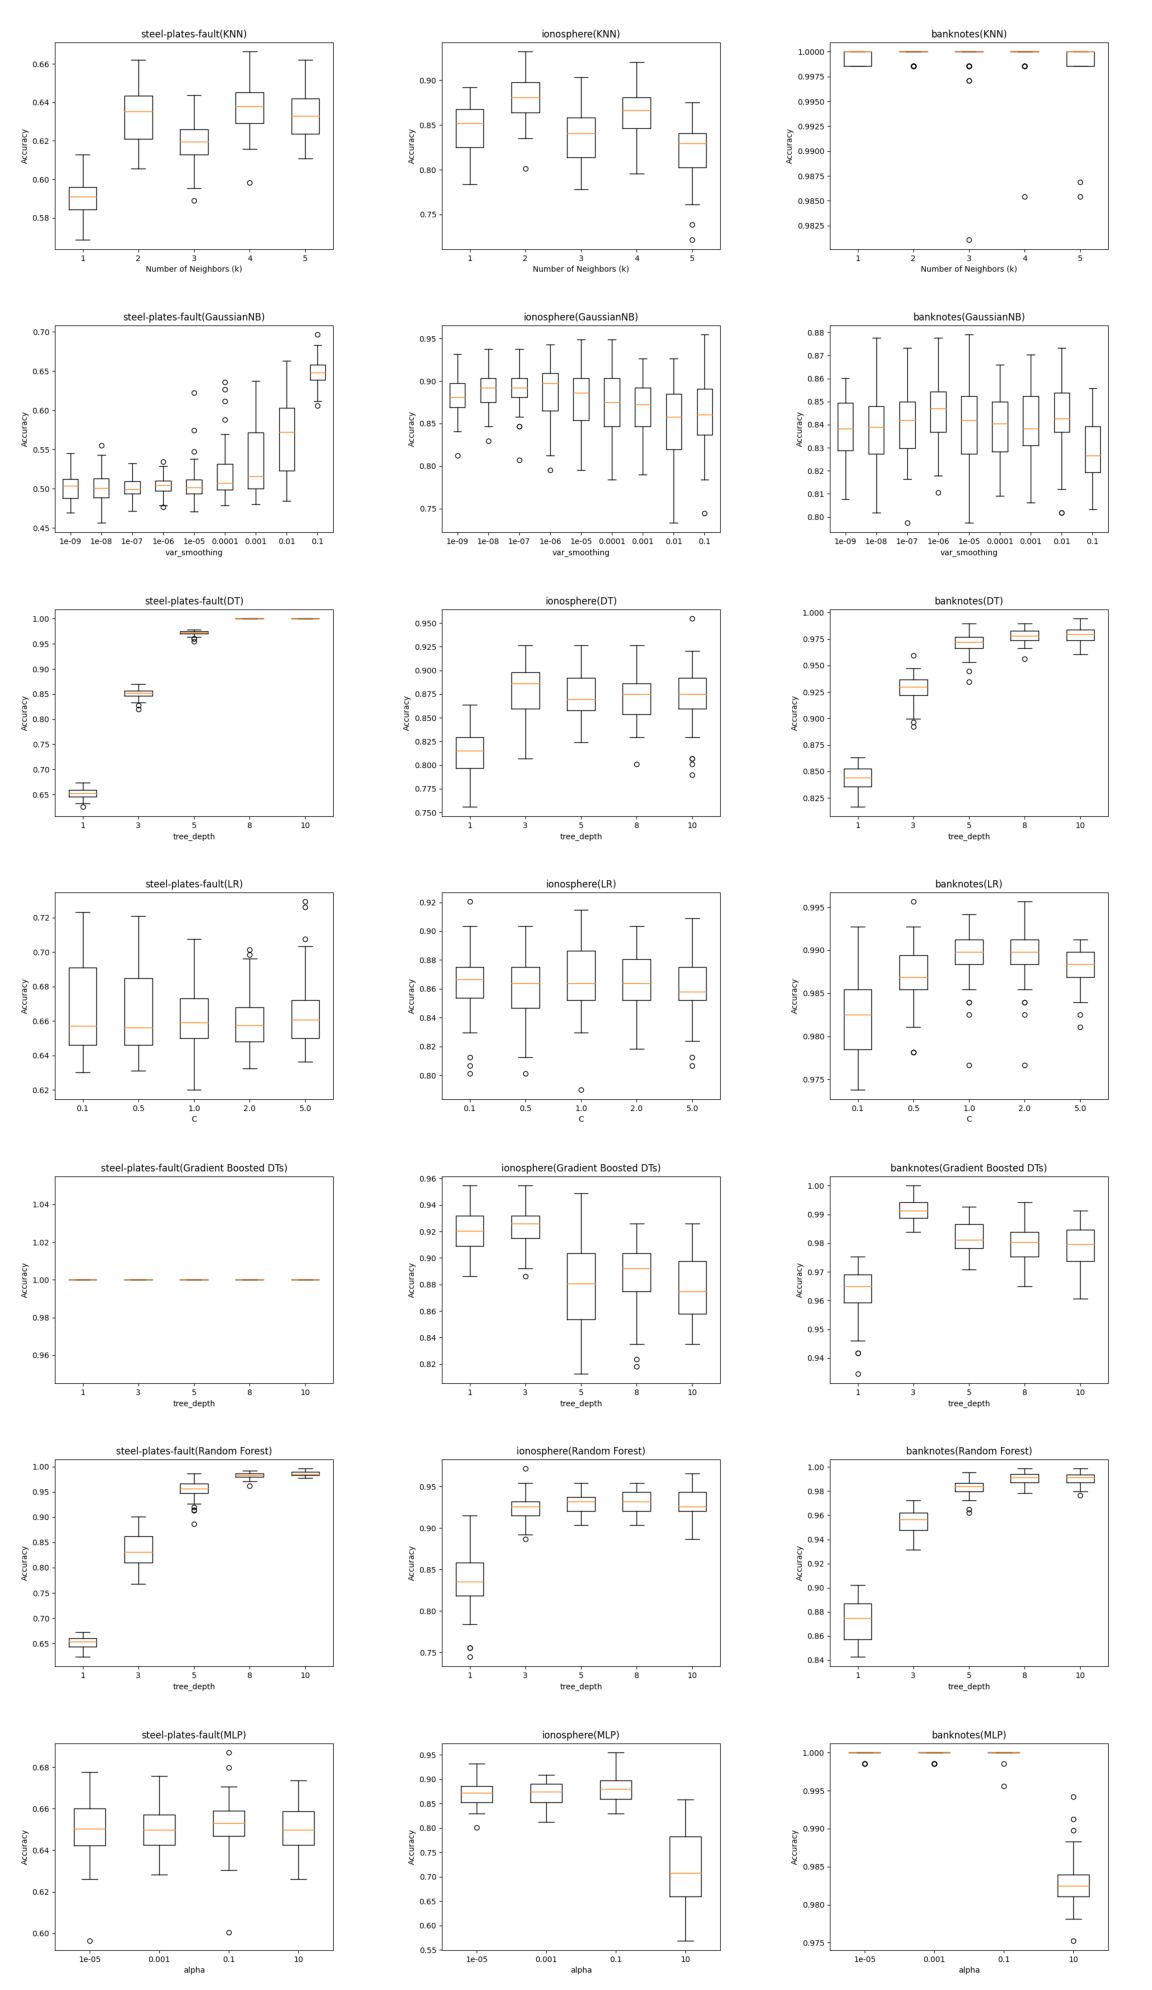

In [6]:
#print form
import matplotlib.image as mpimg

dataframes = [df1,df2,df3]
clf = ["KNN",
        "GaussianNB",
        "DT",
        "LR",
        "Gradient Boosted DTs",
        "Random Forest",
        "MLP"
        ]

fig, axs = plt.subplots(7, 3, figsize=(12, 20))

for i, c in enumerate(clf):
    for j, d in enumerate(dataframes):
        img = mpimg.imread(f"./plots/classifiers/{d.name}({c}).png")  # Load the image
        axs[i, j].imshow(img)  # Display the image
        axs[i, j].axis("off")  # Hide the axes

plt.tight_layout()
plt.savefig("./classifiers.png")



